In [1]:
from keras import backend as K
import h5py
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import glob

Using TensorFlow backend.


In [2]:
#Load Data
cokecan = glob.glob("cokecan/*.png")
beer = glob.glob("beer/*.png")

img_rows = 320
img_cols = 240
num_channel = 3
num_classes = 2

img_data_list = []
img_label_list = [] 
#CokeCan
for path in cokecan:
    img = cv2.imread(path)
    img = cv2.resize(img, (img_rows, img_cols))
    img_data_list.append(img)
    img_label_list.append(0)

#Beer
for path in beer:
    img = cv2.imread(path)
    img = cv2.resize(img, (img_rows, img_cols))
    img_data_list.append(img)
    img_label_list.append(1)

In [3]:
#Shuffle
# import random
# c = zip(img_data_list, img_label_list)
# random.shuffle(c)
# data = [e[0] for e in c]
# label = [e[1] for e in c]
dataz = np.array(img_data_list)
labelz = np.array(img_label_list)
dataz = dataz.astype('float32')/255.0
labelz = np_utils.to_categorical(labelz, num_classes)

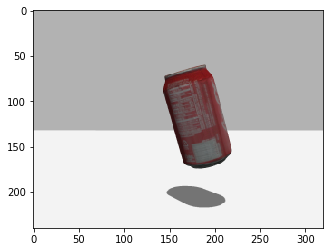

array([ 1.,  0.])

In [4]:
imgz = dataz[101]
plt.imshow(cv2.cvtColor(imgz, cv2.COLOR_BGR2RGB))
plt.show()
labelz[101]

In [5]:
num_classes = 2
batch_size = 32
num_epoch = 15

In [6]:
# dataz = np.array(data)
# labelz = np.array(label)
# dataz = dataz.astype('float32')/255.0
# labelz = np_utils.to_categorical(labelz, num_classes)

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dataz.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.25))
    
    
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))    
model.add(Dropout(0.25))  


model.add(Flatten())  
model.add(Dense(128, activation='relu'))   
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 318, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 236, 316, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 118, 158, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 116, 156, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 114, 154, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 57, 77, 64)        0         
__________

In [9]:
# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=["accuracy"])

In [10]:
# Train the model
model.fit(dataz, labelz,
        batch_size=batch_size,
        shuffle=True,
        epochs=num_epoch,
        validation_split=0.2,
        callbacks=[TensorBoard(log_dir='/tmp/coke_beer')])
 
# Evaluate the model
# scores = model.evaluate(Test_features, Test_labels)

scores = model.evaluate(dataz, labelz)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

#tensorboard --logdir=/tmp/coke_beer

Train on 1120 samples, validate on 280 samples
Epoch 1/15
1120/1120 [==============================] - 570s - loss: 0.2382 - acc: 0.6161 - val_loss: 0.2957 - val_acc: 0.0000e+00
Epoch 2/15
1120/1120 [==============================] - 506s - loss: 0.2044 - acc: 0.6723 - val_loss: 0.2564 - val_acc: 0.3750
Epoch 3/15
1120/1120 [==============================] - 437s - loss: 0.1756 - acc: 0.7357 - val_loss: 0.1586 - val_acc: 0.9929
Epoch 4/15
1120/1120 [==============================] - 435s - loss: 0.1591 - acc: 0.7598 - val_loss: 0.1315 - val_acc: 1.0000
Epoch 5/15
1120/1120 [==============================] - 440s - loss: 0.1132 - acc: 0.8598 - val_loss: 0.0995 - val_acc: 0.9929
Epoch 6/15
1120/1120 [==============================] - 435s - loss: 0.0848 - acc: 0.8973 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 7/15
1120/1120 [==============================] - 448s - loss: 0.0651 - acc: 0.9277 - val_loss: 0.1022 - val_acc: 0.9571
Epoch 8/15
1120/1120 [==============================] - 443s

In [11]:
model.save("model_coke_beer.h5")

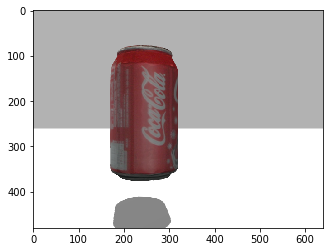

In [12]:
imgxx = cv2.imread("cokecan/messigray1.png")
plt.imshow(cv2.cvtColor(imgxx, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
imgxx = cv2.resize(imgxx, dsize=(320, 240))
imgxx= np.asarray([imgxx])
print model.predict(imgxx)

[[ 1.  0.]]
